[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%204/4.2_mnist_functional.ipynb)

## import

In [ ]:
import tensorflow as tf
import numpy as np

## Dataset

In [ ]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [ ]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## 복잡한 구조로 모델 생성
- 출력을 2개로 나누기 (분기) 
- 2개의 입력을 받는 레이어 구조 만들기

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 13, 13, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 5408)         0           max_pooling2d[0][0]              
______________________________________________________________________________________________

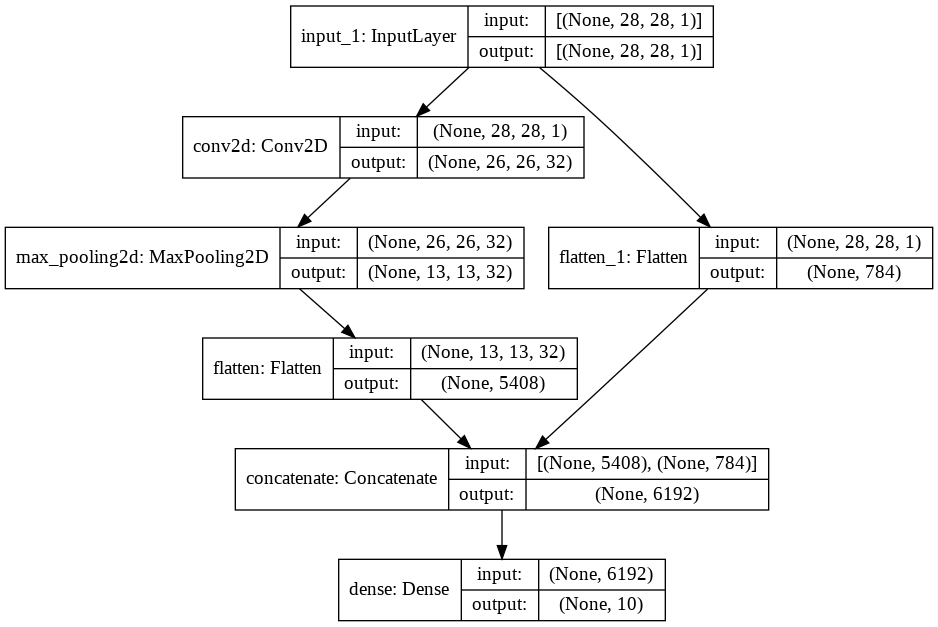

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 37s 2ms/step - loss: 0.3870 - accuracy: 0.8897 - val_loss: 0.0928 - val_accuracy: 0.9728
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0834 - accuracy: 0.9765 - val_loss: 0.0707 - val_accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0604 - accuracy: 0.9827 - val_loss: 0.0694 - val_accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0609 - val_accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0408 - accuracy: 0.9879 - val_loss: 0.0595 - val_accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9901 - val_loss: 0.0575 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0518 - val_accuracy

## multi-output 모델
- 출력 1 : 0 ~ 9 까지 숫자 예측 
- 출력 2: 각 숫자가 홀수인지 짝수인지 예측

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_layer (Conv2D)           (None, 26, 26, 32)   320         inputs[0][0]                     
__________________________________________________________________________________________________
maxpool_layer (MaxPooling2D)    (None, 13, 13, 32)   0           conv2d_layer[0][0]               
__________________________________________________________________________________________________
flatten_layer (Flatten)         (None, 5408)         0           maxpool_layer[0][0]              
____________________________________________________________________________________________

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


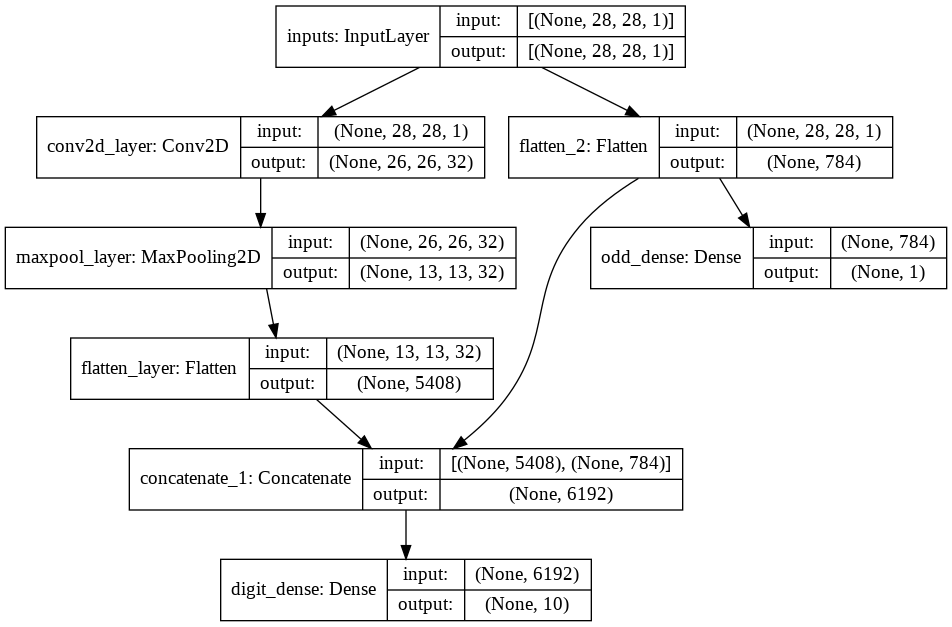

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5736 - digit_dense_loss: 0.3842 - odd_dense_loss: 0.3788 - digit_dense_accuracy: 0.8931 - odd_dense_accuracy: 0.8362 - val_loss: 0.2254 - val_digit_dense_loss: 0.0881 - val_odd_dense_loss: 0.2745 - val_digit_dense_accuracy: 0.9725 - val_odd_dense_accuracy: 0.8892
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2168 - digit_dense_loss: 0.0791 - odd_dense_loss: 0.2754 - digit_dense_accuracy: 0.9766 - odd_dense_accuracy: 0.8878 - val_loss: 0.1929 - val_digit_dense_loss: 0.0617 - val_odd_dense_loss: 0.2624 - val_digit_dense_accuracy: 0.9797 - val_odd_dense_accuracy: 0.8962
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1882 - digit_dense_loss: 0.0568 - odd_dense_loss: 0.2629 - digit_dense_accuracy: 0.9830 - odd_dense_accuracy: 0.8959 - val_loss: 0.1922 - val_digit_dense_loss: 0.0624 - val_odd_dense_loss: 0.2596 - val_digit_dense_accuracy: 0.9789 - va

In [ ]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 1s 4ms/step - loss: 0.1910 - digit_dense_loss: 0.0636 - odd_dense_loss: 0.2548 - digit_dense_accuracy: 0.9815 - odd_dense_accuracy: 0.9015


[0.1909908652305603,
 0.06358117610216141,
 0.25481921434402466,
 0.9815000295639038,
 0.9014999866485596]

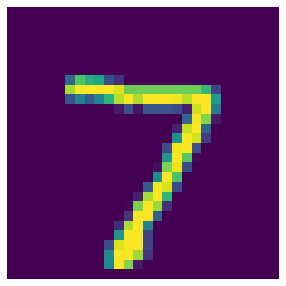

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[2.0695300e-13 1.3510754e-10 8.2652651e-10 1.2023236e-06 3.4593992e-12
 1.2167212e-12 1.8891853e-22 9.9999881e-01 3.0291327e-09 7.6449709e-09]
[0.999582]


In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

## 숫자 분류하는 모델을 재구성 (Transfer Learning)

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


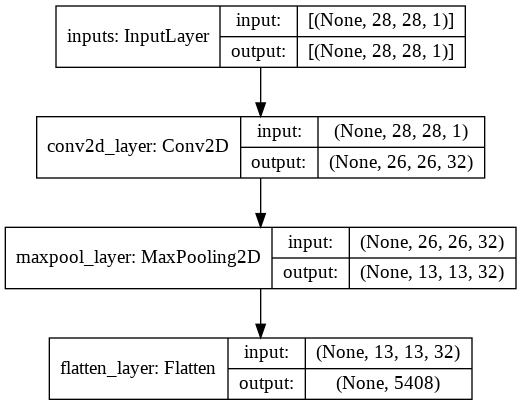

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
base (Functional)            (None, 5408)              320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


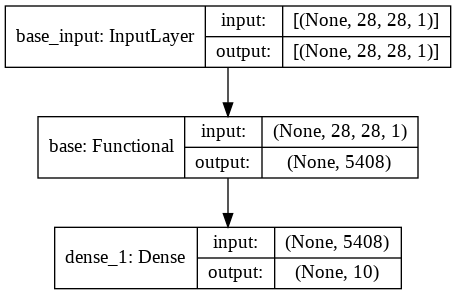

In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

모델 학습 결과를 보면, 에포크 1부터 정확도가 매우 높다.. .기존 모델의 가중치를 가지고 모델 학습이 시작되었기 때문... 

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2563 - accuracy: 0.9304 - val_loss: 0.0732 - val_accuracy: 0.9784
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9830 - val_loss: 0.0534 - val_accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.0513 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0324 - accuracy: 0.9902 - val_loss: 0.0519 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0566 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0529 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.0560 - val_accuracy:

In [ ]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2276 - accuracy: 0.9420 - val_loss: 0.0540 - val_accuracy: 0.9836
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0461 - accuracy: 0.9870 - val_loss: 0.0487 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0326 - accuracy: 0.9902 - val_loss: 0.0503 - val_accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0487 - val_accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.0559 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.0497 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.0549 - val_accuracy:

In [ ]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2290 - accuracy: 0.9407 - val_loss: 0.0562 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.9862 - val_loss: 0.0515 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0498 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0251 - accuracy: 0.9927 - val_loss: 0.0558 - val_accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0198 - accuracy: 0.9942 - val_loss: 0.0539 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.0556 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.0515 - val_accuracy: